<a href="https://colab.research.google.com/github/jadhavneha/IndicLanguageTweets-PopularityPrediction/blob/main/Indic_Tweets_Popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/indicpophash.csv')

In [ ]:
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,time_zone,user_id,username,name,...,likes_count,hashtags,link,retweet,geo,language,pop_score,label,label_new,pop_score_log
0,0,1.511390e+18,1.511390e+18,2022-04-05 17:05:33,2022-04-05,17:05:33,UTC,9.659076e+08,ganeshhirennava,Ganesh H,...,0.0,"['ಅನಕ್ಷರಸ್ಥರ_ಪಂಚರ್_ಶಾಪ್', 'ಮೊಂಡ್_ಹಲಾಲ್_ಸರ್ಟಿಫಿ...",http://twitter.com/anyuser/status/151138959227...,False,NaN,kn,2.0,2.0,2.0,0.693147
1,1,1.509950e+18,1.509950e+18,2022-04-01 17:45:50,2022-04-01,17:45:50,UTC,1.395262e+09,LaxmiputraDesai,DESAI LAXMIPUTRA,...,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/150995017899...,False,NaN,kn,42.0,3.0,4.0,3.737670
2,2,1.509589e+18,1.509589e+18,2022-03-31 17:52:11,2022-03-31,17:52:11,UTC,1.468286e+18,hops_neil,Wilson Morgan ⚡⚡⚡⚡🌩️🌩️🌩️,...,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/150958938914...,False,NaN,kn,1.0,1.0,2.0,0.000000
3,3,1.510501e+18,1.510501e+18,2022-04-03 06:12:39,2022-04-03,06:12:39,UTC,1.328367e+18,repalli_siva,#Hyderabadi,...,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/151050050887...,False,NaN,te,4.0,2.0,3.0,1.386294
4,4,1.513160e+18,1.513160e+18,2022-04-10 14:20:31,2022-04-10,14:20:31,UTC,1.489971e+18,PrashanthSkp1,Prashanth Skp,...,0.0,"['brand', 'boss']",http://twitter.com/anyuser/status/151315999909...,False,NaN,kn,6.0,3.0,3.0,1.791759


In [ ]:
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,time_zone,user_id,username,name,...,likes_count,hashtags,link,retweet,geo,language,pop_score,label,label_new,pop_score_log
0,0,1.511390e+18,1.511390e+18,2022-04-05 17:05:33,2022-04-05,17:05:33,UTC,9.659076e+08,ganeshhirennava,Ganesh H,...,0.0,"['ಅನಕ್ಷರಸ್ಥರ_ಪಂಚರ್_ಶಾಪ್', 'ಮೊಂಡ್_ಹಲಾಲ್_ಸರ್ಟಿಫಿ...",http://twitter.com/anyuser/status/151138959227...,False,NaN,kn,2.0,2.0,2.0,0.693147
1,1,1.509950e+18,1.509950e+18,2022-04-01 17:45:50,2022-04-01,17:45:50,UTC,1.395262e+09,LaxmiputraDesai,DESAI LAXMIPUTRA,...,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/150995017899...,False,NaN,kn,42.0,3.0,4.0,3.737670
2,2,1.509589e+18,1.509589e+18,2022-03-31 17:52:11,2022-03-31,17:52:11,UTC,1.468286e+18,hops_neil,Wilson Morgan ⚡⚡⚡⚡🌩️🌩️🌩️,...,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/150958938914...,False,NaN,kn,1.0,1.0,2.0,0.000000
3,3,1.510501e+18,1.510501e+18,2022-04-03 06:12:39,2022-04-03,06:12:39,UTC,1.328367e+18,repalli_siva,#Hyderabadi,...,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/151050050887...,False,NaN,te,4.0,2.0,3.0,1.386294
4,4,1.513160e+18,1.513160e+18,2022-04-10 14:20:31,2022-04-10,14:20:31,UTC,1.489971e+18,PrashanthSkp1,Prashanth Skp,...,0.0,"['brand', 'boss']",http://twitter.com/anyuser/status/151315999909...,False,NaN,kn,6.0,3.0,3.0,1.791759


In [ ]:
df.isna().sum()/len(df)*100

Unnamed: 0          0.000000
id                  0.000000
conversation_id     0.000000
created_at          0.000000
date                0.000000
time                0.000000
time_zone           0.000000
user_id             0.000000
username            0.000000
name                0.000000
place              25.177433
tweet               0.000000
mentions            0.000000
urls                0.000000
photos              0.000000
replies_count       0.000000
retweet_count       0.000000
likes_count         0.000000
hashtags            0.000000
link                0.000000
retweet             0.000000
geo                99.849633
language            0.000000
pop_score           0.000000
label               0.000000
label_new           0.000000
pop_score_log       0.000000
dtype: float64

In [ ]:
df_new = df.drop('geo', axis=1)

In [ ]:
df_new.dtypes

Unnamed: 0           int64
id                 float64
conversation_id    float64
created_at          object
date                object
time                object
time_zone           object
user_id            float64
username            object
name                object
place               object
tweet               object
mentions            object
urls                object
photos              object
replies_count      float64
retweet_count      float64
likes_count        float64
hashtags            object
link                object
retweet               bool
language            object
pop_score          float64
label              float64
label_new          float64
pop_score_log      float64
dtype: object

In [ ]:
df_new['place'].fillna('Unknown', inplace=True)

In [ ]:
df_new.isna().sum()

Unnamed: 0         0
id                 0
conversation_id    0
created_at         0
date               0
time               0
time_zone          0
user_id            0
username           0
name               0
place              0
tweet              0
mentions           0
urls               0
photos             0
replies_count      0
retweet_count      0
likes_count        0
hashtags           0
link               0
retweet            0
language           0
pop_score          0
label              0
label_new          0
pop_score_log      0
dtype: int64

In [ ]:
df_new.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,time_zone,user_id,username,name,...,retweet_count,likes_count,hashtags,link,retweet,language,pop_score,label,label_new,pop_score_log
0,0,1.511390e+18,1.511390e+18,2022-04-05 17:05:33,2022-04-05,17:05:33,UTC,9.659076e+08,ganeshhirennava,Ganesh H,...,2.0,0.0,"['ಅನಕ್ಷರಸ್ಥರ_ಪಂಚರ್_ಶಾಪ್', 'ಮೊಂಡ್_ಹಲಾಲ್_ಸರ್ಟಿಫಿ...",http://twitter.com/anyuser/status/151138959227...,False,kn,2.0,2.0,2.0,0.693147
1,1,1.509950e+18,1.509950e+18,2022-04-01 17:45:50,2022-04-01,17:45:50,UTC,1.395262e+09,LaxmiputraDesai,DESAI LAXMIPUTRA,...,42.0,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/150995017899...,False,kn,42.0,3.0,4.0,3.737670
2,2,1.509589e+18,1.509589e+18,2022-03-31 17:52:11,2022-03-31,17:52:11,UTC,1.468286e+18,hops_neil,Wilson Morgan ⚡⚡⚡⚡🌩️🌩️🌩️,...,1.0,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/150958938914...,False,kn,1.0,1.0,2.0,0.000000
3,3,1.510501e+18,1.510501e+18,2022-04-03 06:12:39,2022-04-03,06:12:39,UTC,1.328367e+18,repalli_siva,#Hyderabadi,...,4.0,0.0,['BoycottHimalaya'],http://twitter.com/anyuser/status/151050050887...,False,te,4.0,2.0,3.0,1.386294
4,4,1.513160e+18,1.513160e+18,2022-04-10 14:20:31,2022-04-10,14:20:31,UTC,1.489971e+18,PrashanthSkp1,Prashanth Skp,...,6.0,0.0,"['brand', 'boss']",http://twitter.com/anyuser/status/151315999909...,False,kn,6.0,3.0,3.0,1.791759


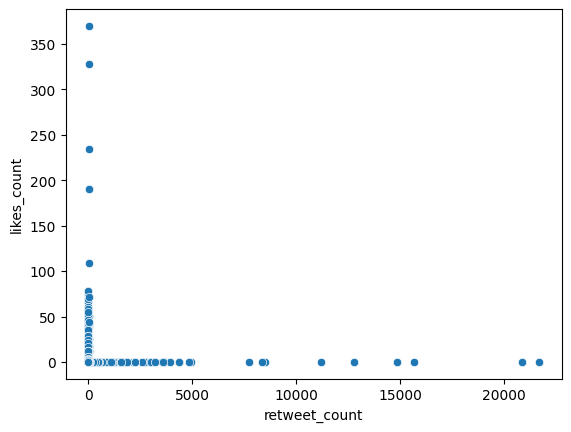

In [ ]:
sns.scatterplot(x='retweet_count', y='likes_count', data=df_new)
plt.show()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16626 non-null  int64  
 1   id               16626 non-null  float64
 2   conversation_id  16626 non-null  float64
 3   created_at       16626 non-null  object 
 4   date             16626 non-null  object 
 5   time             16626 non-null  object 
 6   time_zone        16626 non-null  object 
 7   user_id          16626 non-null  float64
 8   username         16626 non-null  object 
 9   name             16626 non-null  object 
 10  place            16626 non-null  object 
 11  tweet            16626 non-null  object 
 12  mentions         16626 non-null  object 
 13  urls             16626 non-null  object 
 14  photos           16626 non-null  object 
 15  replies_count    16626 non-null  float64
 16  retweet_count    16626 non-null  float64
 17  likes_count 

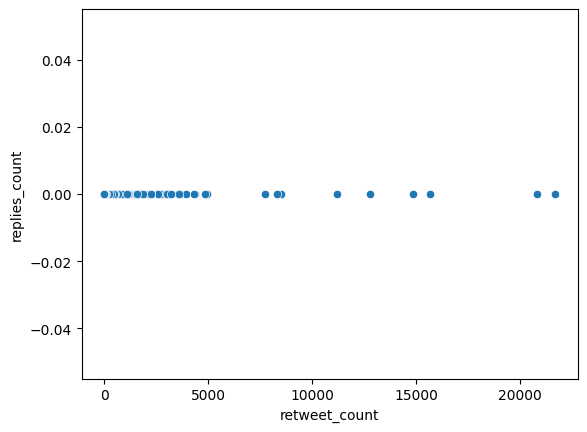

In [ ]:
sns.scatterplot(x='retweet_count', y='replies_count', data=df_new)
plt.show()

In [ ]:
def count_elements(arr):
    return len(arr)

In [ ]:
df_new['mentions_count'] = df['mentions'].apply(count_elements)
df_new['mentions_count']

0        19
1        17
2        19
3        18
4        34
         ..
16621     2
16622     2
16623     2
16624     2
16625    19
Name: mentions_count, Length: 16626, dtype: int64

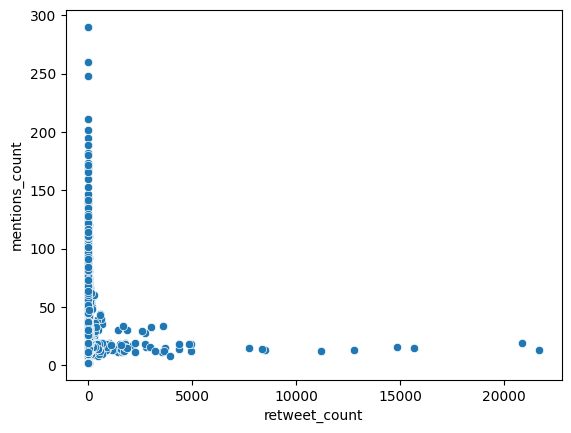

In [ ]:
sns.scatterplot(x='retweet_count', y='mentions_count', data=df_new)
plt.show()

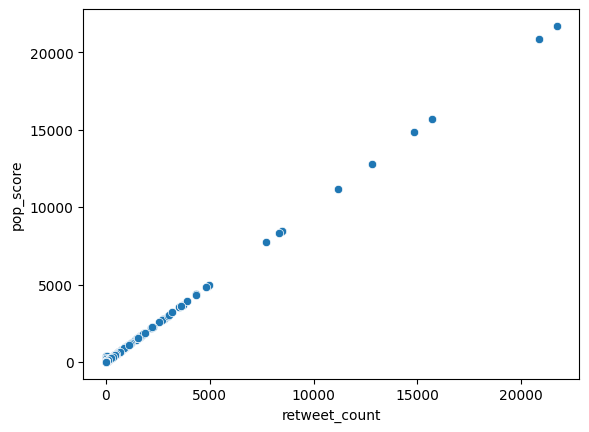

In [ ]:
sns.scatterplot(x='retweet_count', y='pop_score', data=df_new)
plt.show()

In [ ]:
df_new['hashtags_count'] = df['hashtags'].apply(count_elements)
df_new['hashtags_count']

0        104
1         19
2         19
3         19
4         17
        ... 
16621    119
16622    119
16623    119
16624     20
16625     46
Name: hashtags_count, Length: 16626, dtype: int64

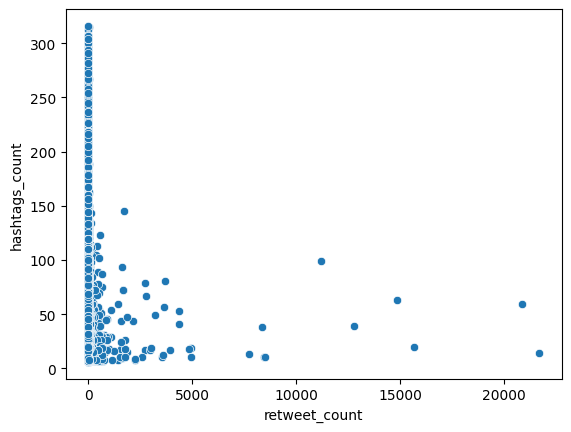

In [ ]:
sns.scatterplot(x='retweet_count', y='hashtags_count', data=df_new)
plt.show()

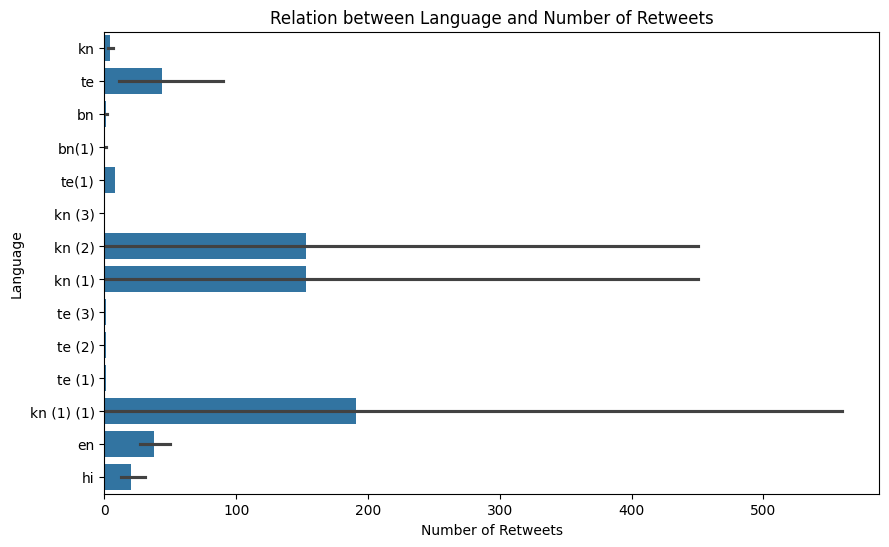

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='retweet_count', y='language', data=df_new)
plt.title('Relation between Language and Number of Retweets')
plt.ylabel('Language')
plt.xlabel('Number of Retweets')
plt.show()


In [ ]:
df_new['language'].value_counts()

en            5000
hi            5000
bn            3123
kn            2038
te            1443
kn (2)           5
kn (1)           5
kn (1) (1)       4
bn(1)            3
te(1)            1
kn (3)           1
te (3)           1
te (2)           1
te (1)           1
Name: language, dtype: int64

In [ ]:
df_new['language'] = df_new['language'].replace({'kn (2)': 'kn', 'kn (1)': 'kn', 'kn (1) (1)': 'kn', 'kn (3)':'kn', 'bn(1)':'bn', 'te(1)':'te', 'te (3)':'te', 'te (2)':'te', 'te (1)':'te'})

In [ ]:
df_new['language'].value_counts()


en    5000
hi    5000
bn    3126
kn    2053
te    1447
Name: language, dtype: int64

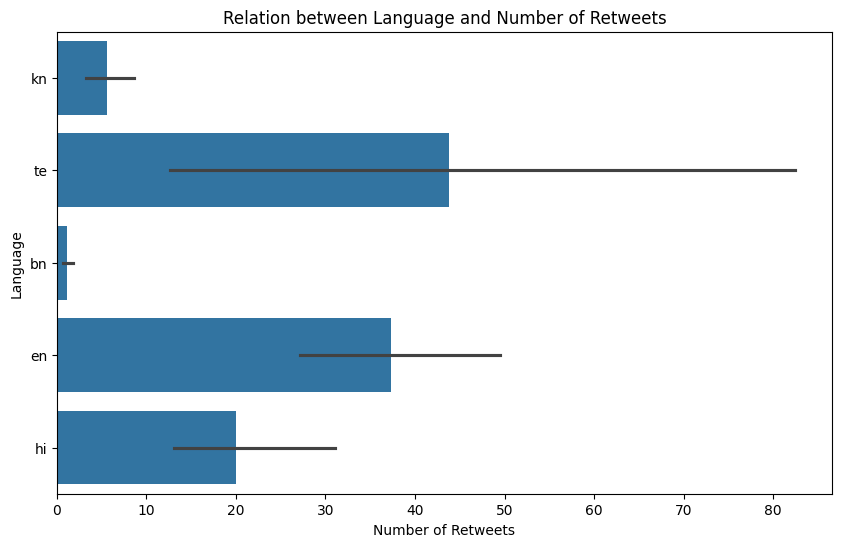

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='retweet_count', y='language', data=df_new)
plt.title('Relation between Language and Number of Retweets')
plt.ylabel('Language')
plt.xlabel('Number of Retweets')
plt.show()


In [ ]:
df_new.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'time',
       'time_zone', 'user_id', 'username', 'name', 'place', 'tweet',
       'mentions', 'urls', 'photos', 'replies_count', 'retweet_count',
       'likes_count', 'hashtags', 'link', 'retweet', 'language', 'pop_score',
       'label', 'label_new', 'pop_score_log', 'mentions_count',
       'hashtags_count'],
      dtype='object')

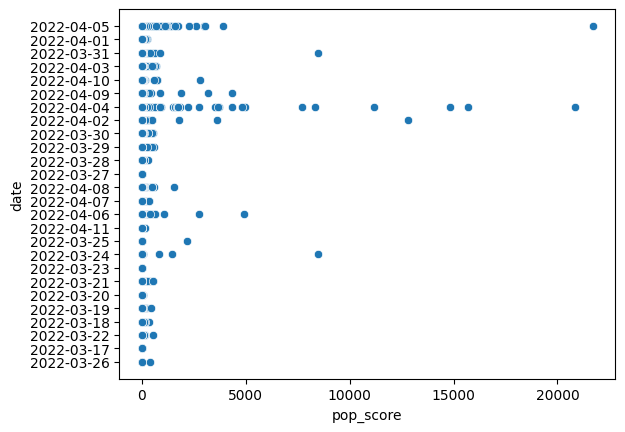

In [ ]:
sns.scatterplot(x='pop_score', y='date', data=df_new)
plt.show()

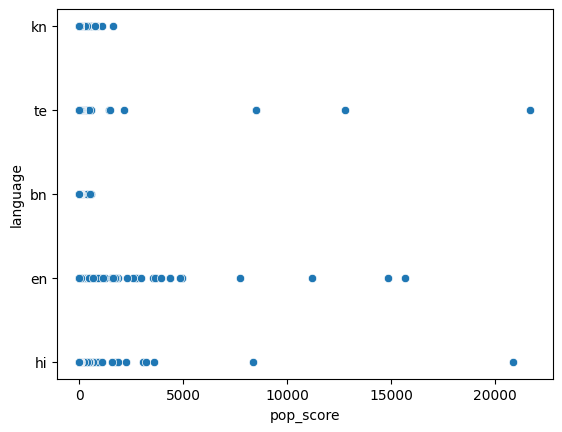

In [ ]:
sns.scatterplot(x='pop_score', y='language', data=df_new)
plt.show()

In [ ]:
df_new['TweetWordCount'] = df_new['tweet'].apply(lambda x: len(str(x).split()))

In [ ]:
df_new[['TweetWordCount', 'tweet']]

,TweetWordCount,tweet
0,8,Mohanku44797106 ಅನಕಷರಸಥರ_ಪಚರ_ಶಪ ನಲಲ ಕಡವ ಮಡ_ಹಲ...
1,13,ShakunthalaHS ಹಮಲಯ ಕಪನ ಅವರದದ ಅತ ಗತತತತ ಆದರ ಸದ...
2,9,anandakennamet1 BoycottHimalaya ಹಲಲ ಹರಕ ಬಳಸವ...
3,14,GulabiDalapati పప బతతయల గబర గళళ BoycottHimal...
4,16,DBossFansMysore ನಡನ ಸಮಸತ ಜನತಗ ಶರರಮನವಮ ಹಬಬದ ...
...,...,...
16621,32,Na Sawal Vasl Na Arz Gham Na Shikve Na Shikayt...
16622,27,Yoon Dil De Rhe Ho Ek Baat To Batao Wajah Qara...
16623,30,Haasil Aur Lahaasil Ke Dayron Mai Sab Ghum Rhe...
16624,22,Ye baat sach hai Pareshaani mai khuda yaad aat...


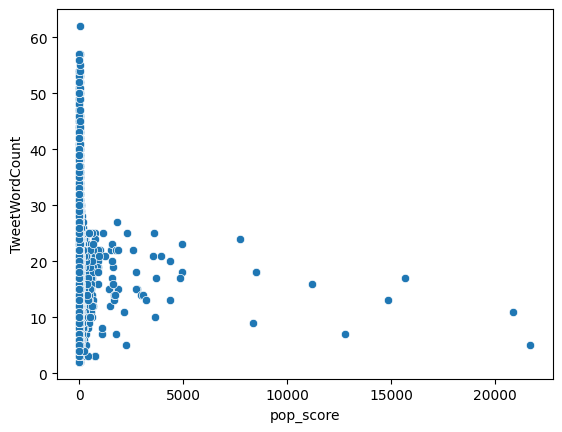

In [ ]:
sns.scatterplot(x='pop_score', y='TweetWordCount', data=df_new)
plt.show()

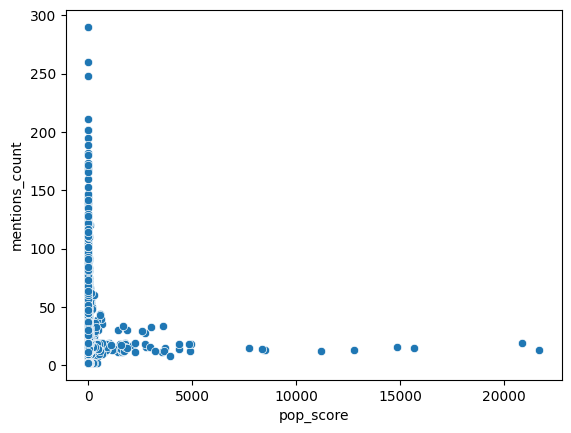

In [ ]:
sns.scatterplot(x='pop_score', y='mentions_count', data=df_new)
plt.show()

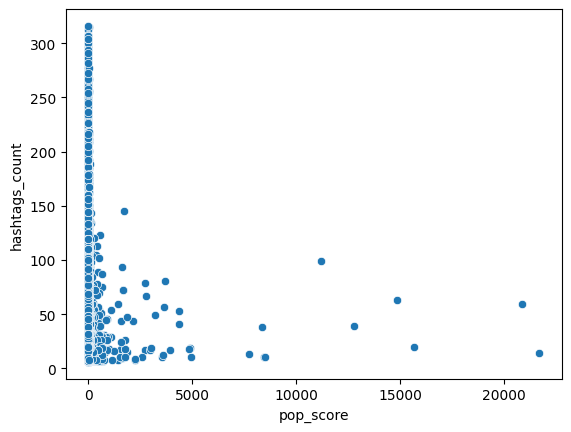

In [ ]:
sns.scatterplot(x='pop_score', y='hashtags_count', data=df_new)
plt.show()

In [ ]:
duplicate_rows = df_new[df_new.duplicated()]

In [ ]:
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0, id, conversation_id, created_at, date, time, time_zone, user_id, username, name, place, tweet, mentions, urls, photos, replies_count, retweet_count, likes_count, hashtags, link, retweet, language, pop_score, label, label_new, pop_score_log, mentions_count, hashtags_count, TweetWordCount]
Index: []

[0 rows x 29 columns]


In [ ]:
sequence_length = df_new['TweetWordCount'].mean().round()
print(sequence_length)

18.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_new['mentions_count_scaled'] = scaler.fit_transform(df_new[['mentions_count']])

In [ ]:
df_new[['mentions_count_scaled', 'mentions_count']]

,mentions_count_scaled,mentions_count
0,0.059028,19
1,0.052083,17
2,0.059028,19
3,0.055556,18
4,0.111111,34
...,...,...
16621,0.000000,2
16622,0.000000,2
16623,0.000000,2
16624,0.000000,2


In [ ]:
df_new['hashtags_count_scaled'] = scaler.fit_transform(df_new[['hashtags_count']])


In [ ]:
df_new['tweet_word_count_scaled'] = scaler.fit_transform(df_new[['TweetWordCount']])


In [ ]:
df_new['pop_score_scaled'] = scaler.fit_transform(df_new[['pop_score']])


In [ ]:
mean_score = df_new['pop_score_scaled'].mean()
print(mean_score)

0.000177083333333317


In [ ]:
df_new['BinaryClassification'] = df_new['pop_score_scaled'].apply(lambda x: 1 if x > mean_score else 0)

In [ ]:
df_new.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,time_zone,user_id,username,name,...,label_new,pop_score_log,mentions_count,hashtags_count,TweetWordCount,mentions_count_scaled,hashtags_count_scaled,tweet_word_count_scaled,pop_score_scaled,BinaryClassification
0,0,1.511390e+18,1.511390e+18,2022-04-05 17:05:33,2022-04-05,17:05:33,UTC,9.659076e+08,ganeshhirennava,Ganesh H,...,2.0,0.693147,19,104,8,0.059028,0.316129,0.100000,0.000046,0
1,1,1.509950e+18,1.509950e+18,2022-04-01 17:45:50,2022-04-01,17:45:50,UTC,1.395262e+09,LaxmiputraDesai,DESAI LAXMIPUTRA,...,4.0,3.737670,17,19,13,0.052083,0.041935,0.183333,0.001890,1
2,2,1.509589e+18,1.509589e+18,2022-03-31 17:52:11,2022-03-31,17:52:11,UTC,1.468286e+18,hops_neil,Wilson Morgan ⚡⚡⚡⚡🌩️🌩️🌩️,...,2.0,0.000000,19,19,9,0.059028,0.041935,0.116667,0.000000,0
3,3,1.510501e+18,1.510501e+18,2022-04-03 06:12:39,2022-04-03,06:12:39,UTC,1.328367e+18,repalli_siva,#Hyderabadi,...,3.0,1.386294,18,19,14,0.055556,0.041935,0.200000,0.000138,0
4,4,1.513160e+18,1.513160e+18,2022-04-10 14:20:31,2022-04-10,14:20:31,UTC,1.489971e+18,PrashanthSkp1,Prashanth Skp,...,3.0,1.791759,34,17,16,0.111111,0.035484,0.233333,0.000230,0


In [ ]:
df_new.to_csv('/content/drive/MyDrive/processed_data.csv', index=False)

In [ ]:
df_sorted = df_new.sort_values(by='pop_score_scaled', ascending=False)

In [ ]:
class_size = len(df) // 3
print(class_size)

5542


In [ ]:
df_sorted['MultiClass'] = 0

In [ ]:
df_sorted.iloc[:class_size, -1] = 1
df_sorted.iloc[class_size: 2 * class_size, -1] = 2
df_sorted.iloc[2 * class_size:, -1] = 3

In [ ]:
df_sorted.head(16626)

,Unnamed: 0,id,conversation_id,created_at,date,time,time_zone,user_id,username,name,...,pop_score_log,mentions_count,hashtags_count,TweetWordCount,mentions_count_scaled,hashtags_count_scaled,tweet_word_count_scaled,pop_score_scaled,BinaryClassification,MultiClass
1056,1056,1.511240e+18,1.511240e+18,2022-04-05 07:12:11,2022-04-05,07:12:11,UTC,1.315176e+18,DVamsi15885716,D.Vamsi,...,9.984929,13,14,5,0.038194,0.025806,0.050000,1.000000,1,1
15335,15335,1.511111e+18,1.511111e+18,2022-04-04 22:37:54,2022-04-04,22:37:54,UTC,1.145348e+18,VijayIsAMAZING,#VeeraRaghavan's GF ᴮᵉᵃˢᵗ,...,9.944821,19,59,11,0.059028,0.170968,0.150000,0.960684,1,1
7313,7313,1.510891e+18,1.510891e+18,2022-04-04 08:03:13,2022-04-04,08:03:13,UTC,1.501123e+18,mortezanik13,Mori,...,9.660715,15,20,17,0.045139,0.045161,0.250000,0.723083,1,1
7193,7193,1.510893e+18,1.510893e+18,2022-04-04 08:10:46,2022-04-04,08:10:46,UTC,1.410642e+18,mcjahidul07,mcjahidul07,...,9.605688,16,63,13,0.048611,0.183871,0.183333,0.684366,1,1
3277,3277,1.510152e+18,1.510152e+18,2022-04-02 07:08:12,2022-04-02,07:08:12,UTC,1.016363e+18,Jagadee62204751,Jagadeesh🌊ᵀʰᵒᵏᵏᵘᵏᵘⁿᵗᵘᵖᵒᵛᵃᵃˡᵉ,...,9.456497,13,39,7,0.038194,0.106452,0.083333,0.589510,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,8203,1.512478e+18,1.512478e+18,2022-04-08 17:11:02,2022-04-08,17:11:02,UTC,3.473411e+09,MasterofIoT,Niel Kirk 尼尔柯克,...,0.000000,25,51,34,0.079861,0.145161,0.533333,0.000000,0,3
8204,8204,1.512478e+18,1.512478e+18,2022-04-08 17:10:47,2022-04-08,17:10:47,UTC,1.379894e+18,vocationnations,vocationnations,...,0.000000,2,69,20,0.000000,0.203226,0.300000,0.000000,0,3
8206,8206,1.512478e+18,1.512478e+18,2022-04-08 17:09:23,2022-04-08,17:09:23,UTC,1.005142e+18,CurrentTrends1,Jobs For You,...,0.000000,14,41,18,0.041667,0.112903,0.266667,0.000000,0,3
8209,8209,1.512476e+18,1.512476e+18,2022-04-08 17:02:00,2022-04-08,17:02:00,UTC,4.059148e+07,HiringCare,𝙹𝚘𝚋𝚒𝚌𝚢: 𝙷𝚒𝚛𝚒𝚗𝚐 𝚅𝚘𝚒𝚌𝚎𝚜,...,0.000000,18,24,22,0.055556,0.058065,0.333333,0.000000,0,3


In [ ]:
class_size_4 = len(df_new) // 4
print(class_size_4)

4156


In [ ]:
df_sorted['MultiClassSplit4'] = 0

In [ ]:
df_sorted.iloc[:class_size_4, -1] = 1
df_sorted.iloc[class_size_4: 2 * class_size_4, -1] = 2
df_sorted.iloc[2 * class_size_4:, -1] = 3

In [ ]:
df_sorted.head(5544)

,Unnamed: 0,id,conversation_id,created_at,date,time,time_zone,user_id,username,name,...,mentions_count,hashtags_count,TweetWordCount,mentions_count_scaled,hashtags_count_scaled,tweet_word_count_scaled,pop_score_scaled,BinaryClassification,MultiClass,MultiClassSplit4
1056,1056,1.511240e+18,1.511240e+18,2022-04-05 07:12:11,2022-04-05,07:12:11,UTC,1.315176e+18,DVamsi15885716,D.Vamsi,...,13,14,5,0.038194,0.025806,0.050000,1.000000,1,1,1
15335,15335,1.511111e+18,1.511111e+18,2022-04-04 22:37:54,2022-04-04,22:37:54,UTC,1.145348e+18,VijayIsAMAZING,#VeeraRaghavan's GF ᴮᵉᵃˢᵗ,...,19,59,11,0.059028,0.170968,0.150000,0.960684,1,1,1
7313,7313,1.510891e+18,1.510891e+18,2022-04-04 08:03:13,2022-04-04,08:03:13,UTC,1.501123e+18,mortezanik13,Mori,...,15,20,17,0.045139,0.045161,0.250000,0.723083,1,1,1
7193,7193,1.510893e+18,1.510893e+18,2022-04-04 08:10:46,2022-04-04,08:10:46,UTC,1.410642e+18,mcjahidul07,mcjahidul07,...,16,63,13,0.048611,0.183871,0.183333,0.684366,1,1,1
3277,3277,1.510152e+18,1.510152e+18,2022-04-02 07:08:12,2022-04-02,07:08:12,UTC,1.016363e+18,Jagadee62204751,Jagadeesh🌊ᵀʰᵒᵏᵏᵘᵏᵘⁿᵗᵘᵖᵒᵛᵃᵃˡᵉ,...,13,39,7,0.038194,0.106452,0.083333,0.589510,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,13437,1.510138e+18,1.510138e+18,2022-04-02 06:10:41,2022-04-02,06:10:41,UTC,7.987780e+17,Kaushik14191,નવનિર્માણ अभियान™️,...,15,31,16,0.045139,0.080645,0.233333,0.000092,0,1,2
5987,5987,1.511687e+18,1.511687e+18,2022-04-06 12:47:39,2022-04-06,12:47:39,UTC,2.790099e+08,MyAnandaBazar,Anandabazar Patrika,...,2,53,9,0.000000,0.151613,0.116667,0.000092,0,1,2
242,242,1.511562e+18,1.511562e+18,2022-04-06 04:30:00,2022-04-06,04:30:00,UTC,1.154639e+18,sirikannada1,SiriKannada,...,2,112,14,0.000000,0.341935,0.200000,0.000092,0,1,2
11351,11351,1.511210e+18,1.511210e+18,2022-04-05 05:11:17,2022-04-05,05:11:17,UTC,9.907664e+17,NFTuneaVerse,BigKeyz| AlienNFT 👽 Theme Song MINTING SOON,...,17,66,27,0.052083,0.193548,0.416667,0.000092,0,2,2


In [ ]:
df_sorted.to_csv('/content/drive/MyDrive/multiclass_data.csv', index=False)


In [ ]:
df_new.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'time',
       'time_zone', 'user_id', 'username', 'name', 'place', 'tweet',
       'mentions', 'urls', 'photos', 'replies_count', 'retweet_count',
       'likes_count', 'hashtags', 'link', 'retweet', 'language', 'pop_score',
       'label', 'label_new', 'pop_score_log', 'mentions_count',
       'hashtags_count', 'TweetWordCount', 'mentions_count_scaled',
       'hashtags_count_scaled', 'tweet_word_count_scaled', 'pop_score_scaled',
       'BinaryClassification'],
      dtype='object')

In [ ]:
df_new.drop('Unnamed: 0', axis=1)

,id,conversation_id,created_at,date,time,time_zone,user_id,username,name,place,...,label_new,pop_score_log,mentions_count,hashtags_count,TweetWordCount,mentions_count_scaled,hashtags_count_scaled,tweet_word_count_scaled,pop_score_scaled,BinaryClassification
0,1.511390e+18,1.511390e+18,2022-04-05 17:05:33,2022-04-05,17:05:33,UTC,9.659076e+08,ganeshhirennava,Ganesh H,bagalkot,...,2.0,0.693147,19,104,8,0.059028,0.316129,0.100000,0.000046,0
1,1.509950e+18,1.509950e+18,2022-04-01 17:45:50,2022-04-01,17:45:50,UTC,1.395262e+09,LaxmiputraDesai,DESAI LAXMIPUTRA,"Mumbai, India",...,4.0,3.737670,17,19,13,0.052083,0.041935,0.183333,0.001890,1
2,1.509589e+18,1.509589e+18,2022-03-31 17:52:11,2022-03-31,17:52:11,UTC,1.468286e+18,hops_neil,Wilson Morgan ⚡⚡⚡⚡🌩️🌩️🌩️,Antarctica,...,2.0,0.000000,19,19,9,0.059028,0.041935,0.116667,0.000000,0
3,1.510501e+18,1.510501e+18,2022-04-03 06:12:39,2022-04-03,06:12:39,UTC,1.328367e+18,repalli_siva,#Hyderabadi,Unknown,...,3.0,1.386294,18,19,14,0.055556,0.041935,0.200000,0.000138,0
4,1.513160e+18,1.513160e+18,2022-04-10 14:20:31,2022-04-10,14:20:31,UTC,1.489971e+18,PrashanthSkp1,Prashanth Skp,Unknown,...,3.0,1.791759,34,17,16,0.111111,0.035484,0.233333,0.000230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,1.510322e+18,1.510322e+18,2022-04-02 18:22:02,2022-04-02,18:22:02,UTC,8.363050e+17,_the_younglord_,Oye Ayan (ਆਇਨ ਫੈਜ਼ ਆਲਮ ਫਾਰੂਕੀ) 🇮🇳,"New Delhi, India",...,2.0,0.693147,2,119,32,0.000000,0.364516,0.500000,0.000046,0
16622,1.510321e+18,1.510321e+18,2022-04-02 18:20:48,2022-04-02,18:20:48,UTC,8.363050e+17,_the_younglord_,Oye Ayan (ਆਇਨ ਫੈਜ਼ ਆਲਮ ਫਾਰੂਕੀ) 🇮🇳,"New Delhi, India",...,2.0,0.000000,2,119,27,0.000000,0.364516,0.416667,0.000000,0
16623,1.510321e+18,1.510321e+18,2022-04-02 18:19:58,2022-04-02,18:19:58,UTC,8.363050e+17,_the_younglord_,Oye Ayan (ਆਇਨ ਫੈਜ਼ ਆਲਮ ਫਾਰੂਕੀ) 🇮🇳,"New Delhi, India",...,2.0,0.693147,2,119,30,0.000000,0.364516,0.466667,0.000046,0
16624,1.510318e+18,1.510318e+18,2022-04-02 18:06:14,2022-04-02,18:06:14,UTC,3.590133e+08,Diabolicaltor,Qammer Bilal,"Earth, MilkyWay Galaxy",...,2.0,0.000000,2,20,22,0.000000,0.045161,0.333333,0.000000,0


In [ ]:
df_new['photos_count'] = df_new['photos'].str.split('jpg').apply(count_elements)

In [ ]:
user_tweet_count = df_new.groupby('user_id').size().reset_index(name='user_tweet_count')
print(user_tweet_count)

           user_id  user_tweet_count
0     8.058200e+05                 1
1     8.183400e+05                 1
2     8.756410e+05                 1
3     1.219301e+06                 1
4     1.918981e+06                 1
...            ...               ...
8255  1.512983e+18                 1
8256  1.513056e+18                 1
8257  1.513084e+18                 1
8258  1.513218e+18                 1
8259  1.513343e+18                 1

[8260 rows x 2 columns]


In [ ]:
user_tweet_count[user_tweet_count['user_tweet_count'] == user_tweet_count['user_tweet_count'].max()]

,user_id,user_tweet_count
1108,291585081.0,312


In [ ]:
df_new = df_new.merge(user_tweet_count, on='user_id', how='left')

In [ ]:
df_new.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,time_zone,user_id,username,name,...,mentions_count,hashtags_count,TweetWordCount,mentions_count_scaled,hashtags_count_scaled,tweet_word_count_scaled,pop_score_scaled,BinaryClassification,photos_count,user_tweet_count
0,0,1.511390e+18,1.511390e+18,2022-04-05 17:05:33,2022-04-05,17:05:33,UTC,9.659076e+08,ganeshhirennava,Ganesh H,...,19,104,8,0.059028,0.316129,0.100000,0.000046,0,1,1
1,1,1.509950e+18,1.509950e+18,2022-04-01 17:45:50,2022-04-01,17:45:50,UTC,1.395262e+09,LaxmiputraDesai,DESAI LAXMIPUTRA,...,17,19,13,0.052083,0.041935,0.183333,0.001890,1,1,1
2,2,1.509589e+18,1.509589e+18,2022-03-31 17:52:11,2022-03-31,17:52:11,UTC,1.468286e+18,hops_neil,Wilson Morgan ⚡⚡⚡⚡🌩️🌩️🌩️,...,19,19,9,0.059028,0.041935,0.116667,0.000000,0,2,1
3,3,1.510501e+18,1.510501e+18,2022-04-03 06:12:39,2022-04-03,06:12:39,UTC,1.328367e+18,repalli_siva,#Hyderabadi,...,18,19,14,0.055556,0.041935,0.200000,0.000138,0,1,1
4,4,1.513160e+18,1.513160e+18,2022-04-10 14:20:31,2022-04-10,14:20:31,UTC,1.489971e+18,PrashanthSkp1,Prashanth Skp,...,34,17,16,0.111111,0.035484,0.233333,0.000230,0,1,2


In [ ]:
df_new['photos_count_scaled'] = scaler.fit_transform(df_new[['photos_count']])

In [ ]:
df_new['user_tweet_count_scaled'] = scaler.fit_transform(df_new[['user_tweet_count']])

In [ ]:
df_new['retweet_count_scaled']= scaler.fit_transform(df_new[['retweet_count']])

In [ ]:
df_new['likes_count_scaled']= scaler.fit_transform(df_new[['likes_count']])

In [ ]:
df_new['replies_count_scaled']= scaler.fit_transform(df_new[['replies_count']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_new['pop_score_scaled']= scaler.fit_transform(df_new[['pop_score']])


In [ ]:
mean_score = df_new['pop_score_scaled'].mean()
print(mean_score)

0.028459259259259264


In [ ]:
df_new['BinaryClassification'] = df_new['pop_score_scaled'].apply(lambda x: 1 if x > mean_score else 0)


In [ ]:
df_new.to_csv('/content/drive/MyDrive/processed_data.csv', index=False)

In [ ]:
!pip install tensorflow tensorflow_hub spektral
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from spektral.layers import GCNConv, GlobalSumPool, GraphSageConv
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow_text as text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/MLPOP/ResearchProject/processed_data.csv', nrows=500)

In [ ]:
dt,dx=train_test_split(df_new,test_size=0.2,random_state=18)

In [ ]:
dt=dt.reset_index()
dx=dx.reset_index()

In [ ]:
X_train=dt["tweet"].values

In [ ]:
Y_train=np.asarray(dt['BinaryClassification'].values).astype('float32')

In [ ]:
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_test=dx["tweet"].values

In [ ]:
Y_test=np.asarray(dx['BinaryClassification'].values).astype('float32')

In [ ]:
Y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
additional_features=dt[["retweet_count_scaled",'likes_count_scaled','replies_count_scaled','hashtags_count_scaled', 'mentions_count_scaled', 'tweet_word_count_scaled',
       'photos_count_scaled',"user_tweet_count_scaled"]].values

In [ ]:
additional_features_t=dx[["retweet_count_scaled",'likes_count_scaled','replies_count_scaled','hashtags_count_scaled', 'mentions_count_scaled', 'tweet_word_count_scaled',
       'photos_count_scaled',"user_tweet_count_scaled"]].values

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
sentiment_probs = []

for tweet in dt['tweet']:
    inputs = tokenizer(tweet, return_tensors="pt", truncation=True, padding=True)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits

    softmax_probs = torch.softmax(logits, dim=-1).cpu().detach().numpy()[0]

    sentiment_probs.append(softmax_probs)

In [ ]:
S_train = np.array(sentiment_probs)

In [ ]:
np.save('/content/drive/MyDrive/S_train.npy', S_train)

In [ ]:
S_train

array([[0.37182558, 0.30091798, 0.32725647],
       [0.3802502 , 0.2880517 , 0.3316981 ],
       [0.38003412, 0.29511172, 0.32485417],
       ...,
       [0.36529076, 0.28646493, 0.34824434],
       [0.38346022, 0.28069118, 0.33584863],
       [0.36714318, 0.2919533 , 0.34090346]], dtype=float32)

In [ ]:
S_train.shape

(400, 3)

In [ ]:
sentiment_probs_test = []

for tweet in dx['tweet']:

    inputs = tokenizer(tweet, return_tensors="pt", truncation=True, padding=True)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits

    softmax_probs = torch.softmax(logits, dim=-1).cpu().detach().numpy()[0]

    sentiment_probs_test.append(softmax_probs)

S_test = np.array(sentiment_probs_test)

In [ ]:
np.save('/content/drive/MyDrive/S_test.npy', S_test)

In [ ]:
S_test.shape

(100, 3)

In [ ]:
import tensorflow as tf
import numpy as np
from transformers import BertTokenizer, TFBertModel

In [ ]:


# Enable NumPy-like behavior in TensorFlow
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Load the mBERT model and tokenizer
model_name = "bert-base-multilingual-cased"  # Pre-trained mBERT model name
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertModel.from_pretrained(model_name)

# Assuming dt is your DataFrame containing tweet data
text_column = dt['tweet'].values.tolist()
numerical_features = dt[["retweet_count_scaled",'likes_count_scaled','replies_count_scaled','hashtags_count_scaled', 'mentions_count_scaled', 'tweet_word_count_scaled',
       'photos_count_scaled',"user_tweet_count_scaled"]].values.tolist()

inputs = []
for text, features in zip(text_column, numerical_features):
    text_tokens = tokenizer.encode(text, add_special_tokens=True, max_length=128, padding='max_length', truncation=True)
    inputs.append(features + text_tokens)

# Convert inputs to NumPy array
input_data = np.array(inputs, dtype=np.int32)

# Create attention mask
attention_mask = np.where(input_data != 0, 1, 0)

# Convert inputs and attention mask to TensorFlow tensors
input_data = tf.convert_to_tensor(input_data, dtype=tf.int32)
attention_mask = tf.convert_to_tensor(attention_mask, dtype=tf.int32)

# Pass the input through the model
outputs = model(input_data, attention_mask=attention_mask)

# Extract the [CLS] token embeddings (pooled output)
pooled_output_train = outputs[1]  # Using index 1 to get the pooled output

# Convert pooled_output_train to NumPy array if needed
pooled_output_train = pooled_output_train.numpy()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
text_column = dx['tweet'].values.tolist()
numerical_features = dx[["retweet_count_scaled",'likes_count_scaled','replies_count_scaled','hashtags_count_scaled', 'mentions_count_scaled', 'tweet_word_count_scaled',
       'photos_count_scaled',"user_tweet_count_scaled"]].values.tolist()

inputs = []
for text, features in zip(text_column, numerical_features):
    text_tokens = tokenizer.encode(text, add_special_tokens=True, max_length=128, padding='max_length', truncation=True)
    inputs.append(features + text_tokens)

# Convert inputs to NumPy array
input_data = np.array(inputs, dtype=np.int32)

# Create attention mask
attention_mask = np.where(input_data != 0, 1, 0)

# Convert inputs and attention mask to TensorFlow tensors
input_data = tf.convert_to_tensor(input_data, dtype=tf.int32)
attention_mask = tf.convert_to_tensor(attention_mask, dtype=tf.int32)

# Pass the input through the model
outputs = model(input_data, attention_mask=attention_mask)

# Extract the [CLS] token embeddings (pooled output)
pooled_output_test = outputs[1]  # Using index 1 to get the pooled output

# Convert pooled_output_train to NumPy array if needed
pooled_output_test = pooled_output_test.numpy()

In [ ]:
concatenated_features = tf.concat([pooled_output_train, S_train], axis=1)

In [ ]:
concatenated_features_test = tf.concat([pooled_output_test, S_test], axis=1)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
classification_model = Sequential([
    Dense(771, activation='tanh', input_shape=(concatenated_features.shape[1],)),
    Dropout(0.1),
    Dense(388, activation='tanh', input_shape=(concatenated_features.shape[1],)),
    Dropout(0.1),
    Dense(194, activation='tanh', input_shape=(concatenated_features.shape[1],)),
    Dropout(0.1),
    Dense(97, activation='tanh', input_shape=(concatenated_features.shape[1],)),
    Dropout(0.1),
    Dense(48, activation='tanh', input_shape=(concatenated_features.shape[1],)),
    Dropout(0.1),
    Dense(24, activation='tanh', input_shape=(concatenated_features.shape[1],)),
    Dropout(0.1),
    Dense(12, activation='tanh', input_shape=(concatenated_features.shape[1],)),

    Dropout(0.1),
    Dense(1, activation='sigmoid') #linear
])

classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #mse mae

In [ ]:
concatenated_features.shape


TensorShape([400, 771])

In [ ]:
classification_model.fit(concatenated_features,Y_train, epochs=10, batch_size=32)

Epoch 1/10
13/13 [==============================] - 3s 30ms/step - loss: 0.2288 - accuracy: 0.9375
Epoch 2/10
13/13 [==============================] - 0s 25ms/step - loss: 0.1197 - accuracy: 0.9800
Epoch 3/10
13/13 [==============================] - 0s 16ms/step - loss: 0.1138 - accuracy: 0.9800
Epoch 4/10
13/13 [==============================] - 0s 16ms/step - loss: 0.1074 - accuracy: 0.9800
Epoch 5/10
13/13 [==============================] - 0s 18ms/step - loss: 0.1044 - accuracy: 0.9800
Epoch 6/10
13/13 [==============================] - 0s 17ms/step - loss: 0.1024 - accuracy: 0.9800
Epoch 7/10
13/13 [==============================] - 0s 16ms/step - loss: 0.1002 - accuracy: 0.9800
Epoch 8/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0988 - accuracy: 0.9800
Epoch 9/10
13/13 [==============================] - 0s 16ms/step - loss: 0.0969 - accuracy: 0.9800
Epoch 10/10
13/13 [==============================] - 0s 17ms/step - loss: 0.1066 - accuracy: 0.9800


In [ ]:
y_pred=classification_model.predict(concatenated_features_test)

4/4 [==============================] - 0s 5ms/step


In [ ]:
y_pred

array([[0.01993654],
       [0.01989092],
       [0.01876681],
       [0.01958955],
       [0.02004759],
       [0.01822967],
       [0.01809006],
       [0.01887452],
       [0.0179223 ],
       [0.01942178],
       [0.02003145],
       [0.01849828],
       [0.01960963],
       [0.01954689],
       [0.01926565],
       [0.0198469 ],
       [0.01972482],
       [0.02008948],
       [0.01800015],
       [0.01996961],
       [0.01787885],
       [0.01995355],
       [0.01997592],
       [0.01776685],
       [0.02000588],
       [0.02001256],
       [0.01776369],
       [0.01996607],
       [0.01793487],
       [0.01999639],
       [0.01796426],
       [0.01970684],
       [0.01995872],
       [0.01797445],
       [0.01960283],
       [0.01991465],
       [0.01777577],
       [0.01995284],
       [0.01989805],
       [0.0198671 ],
       [0.02002243],
       [0.01998585],
       [0.01997152],
       [0.02005705],
       [0.01997479],
       [0.01995515],
       [0.02010999],
       [0.018

0.9601798760537081

In [ ]:
y_pred = np.where(y_pred > mean_score, 1, 0)


In [ ]:
y_pred = y_pred.reshape(-1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Y_test


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
precision_score(Y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [ ]:
recall_score(Y_test,y_pred)


0.0

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        96
         1.0       0.00      0.00      0.00         4

    accuracy                           0.96       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.92      0.96      0.94       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
